In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [14]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i]) 
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [15]:
x=df.drop("Weight",axis=1)
y=df["Weight"]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
y_pred=model.predict(x_test)
y_pred

array([161.33228415, 197.89543847, 168.50055633, ..., 123.79471958,
       176.02065703,  95.94934448], shape=(2000,))

In [19]:
r_score=r2_score(y_pred,y_test)
r_score


0.8484225345184403

In [20]:
mse=mean_squared_error(y_pred,y_test)
print(mse)
rmsc=np.sqrt(mse)
rmsc

145.38559400652971


np.float64(12.057594868236771)

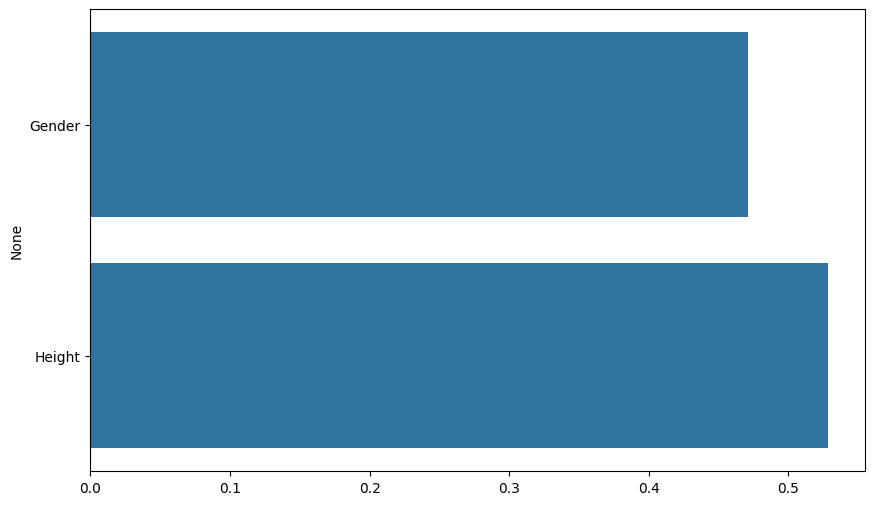

In [21]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [22]:
new_data=pd.DataFrame({
    "Gender":[70.000],
    "Height":[80.000000]
    })
predict=model.predict(new_data)
print(predict)

[262.98021441]
